# 立体图像的深度图

### 目标
在本节中，
- 我们将学习根据立体图像创建深度图。

### 基础
在上一节中，我们看到了对极约束和其他相关术语等基本概念。我们还看到，如果我们有两个场景相同的图像，则可以通过直观的方式从中获取深度信息。下面是一张图片和一些简单的数学公式证明了这种想法。

![](data/stereo_depth.jpg)

上图包含等效三角形。编写它们的等式将产生以下结果：

$$
disparity = x - x' = \frac{Bf}{Z}
$$

$x$和$x'$是图像平面中与场景点3D相对应的点与其相机中心之间的距离。$B$是两个摄像机之间的距离（我们知道），$f$是摄像机的焦距（已经知道）。简而言之，上述方程式表示场景中某个点的深度与相应图像点及其相机中心的距离差成反比。因此，利用此信息，我们可以得出图像中所有像素的深度。

因此，它在两个图像之间找到了对应的匹配项。我们已经看到了Epiline约束如何使此操作更快，更准确。一旦找到匹配项，就会发现差异。让我们看看如何使用OpenCV做到这一点。

### 代码
下面的代码片段显示了创建视差图的简单过程。

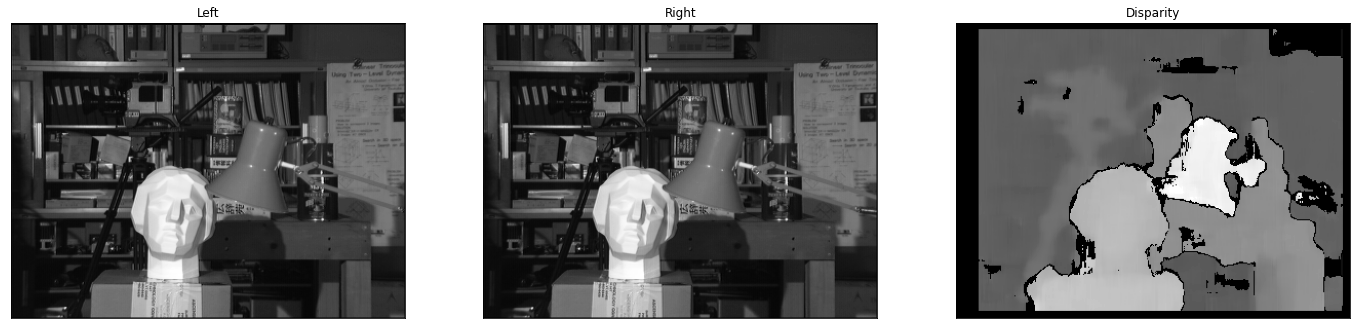

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

imgL = cv.imread('data/tsukuba_l.png',0)
imgR = cv.imread('data/tsukuba_r.png',0)

stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)

disparity = stereo.compute(imgL,imgR)

plt.figure(figsize=(24,8))

plt.subplot(131)
plt.imshow(imgL,'gray')
plt.title('Left')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(imgR,'gray')
plt.title('Right')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(disparity,'gray')
plt.title('Disparity')
plt.xticks([]), plt.yticks([])

plt.show()

图像包含原始图像（左）及其视差图（右）。如你所见，结果受到高度噪声的污染。通过调整numDisparities和blockSize的值，可以获得更好的结果。

当你熟悉StereoBM时，会有一些参数，可能需要微调参数以获得更好，更平滑的结果。参数：
- texture_threshold：过滤出纹理不足以进行可靠匹配
- 区域斑点范围和大小：基于块的匹配器通常会在对象边界附近产生“斑点”，其中匹配窗口捕获一侧的前景和背景 在另一场景中，匹配器似乎还在桌子上投影的纹理中找到小的虚假匹配项。为了消除这些伪像，我们使用由speckle_size和speckle_range参数控制的散斑滤镜对视差图像进行后处理。speckle_size是将视差斑点排除为“斑点”的像素数。speckle_range控制必须将值差异视为同一对象的一部分的程度。
- 视差数量：滑动窗口的像素数。它越大，可见深度的范围就越大，但是需要更多的计算。
- min_disparity：从开始搜索的左像素的x位置开始的偏移量。
- uniqueness_ratio：另一个后过滤步骤。如果最佳匹配视差不足够好于搜索范围中的所有其他视差，则将像素滤出。如果texture_threshold和斑点过滤仍在通过虚假匹配，则可以尝试进行调整。
- prefilter_size和prefilter_cap：预过滤阶段，可标准化图像亮度并增强纹理，以准备块匹配。通常，你不需要调整这些。

### 附加资源
- Ros stereo img processing wiki page

### 练习
1. OpenCV样本包含生成视差图及其3D重建的示例。查看OpenCV-Python示例代码stereo_match.py​​